# Seaborn Exercises

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data
import seaborn as sns
from env2 import host, username, password

<hr style="border:2px solid gray">

## Part I:
Use the iris database to answer the following quesitons:

1. What does the distribution of petal lengths look like?
2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.
3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.
4. Which features would be best used to predict species?

## Part II:
1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:
    - a. Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
    - b. Does whether or not a province is Catholic influence fertility?
    - c. What measure correlates most strongly with fertility?

4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

<hr style="border:2px solid gray">

### Part I:
Use the iris database to answer the following quesitons:

![Iris](iris.jpg)

In [2]:
#bring in the iris dataset from seaborn
iris_ds = sns.load_dataset('iris')

In [4]:
#another way to bring in the data from pydataset
iris = data('iris')
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [3]:
#call and look at first 5 rows
#it is the same data from both sources but for this, we'll be using seaborn
iris_ds.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
#what kind of data do we have?
iris_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#how many of each species do we have?
#we can see the species are evenly split
iris_ds.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

#### #1. What does the distribution of petal lengths look like?

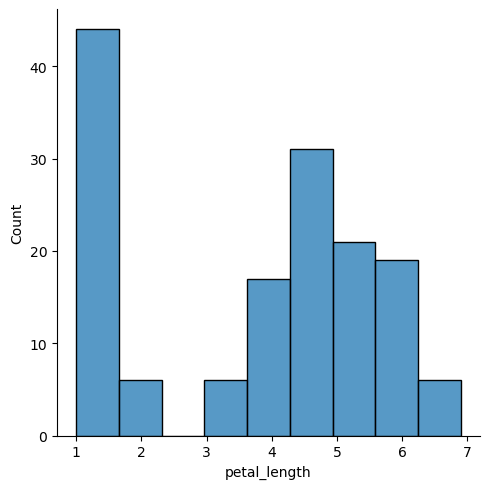

In [6]:
#in the iris dataset, let's look at petal length
sns.displot(data= iris_ds, x='petal_length')

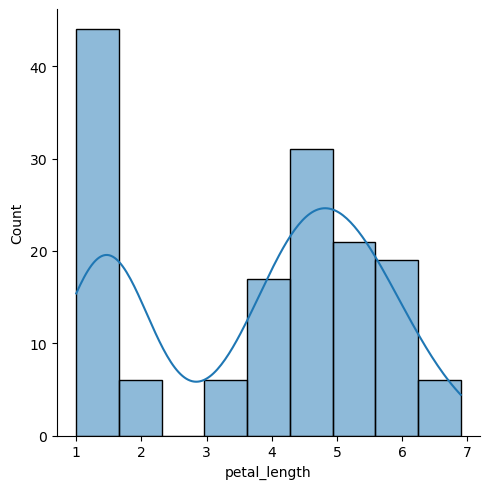

In [48]:
#another way to write the syntax
sns.displot(iris_ds.petal_length, kde=True)
plt.show()

#### #2. Is there a correlation between petal length and petal width? Use http://guessthecorrelation.com/ as a hint to how we could visually determine if a correlation exists between two numeric columns.


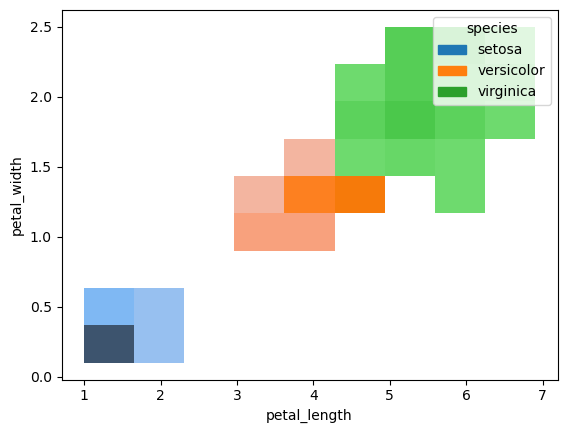

In [49]:
sns.histplot(data = iris_ds, x='petal_length', y='petal_width', hue= 'species')
plt.show()

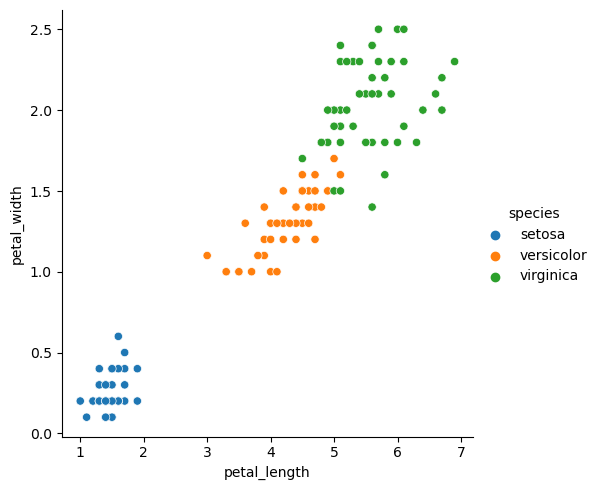

In [50]:
sns.relplot(data=iris_ds, x='petal_length', y='petal_width', hue= 'species')
plt.show()

#### #3. Would it be reasonable to predict species based on sepal width and sepal length? For this, you'll visualize two numeric columns through the lense of a categorical column.


**Answer**:
- MAY be able to predict 'setosa' based on sepal size
    - Setosa (blue) have shorter sepal lengths/ are wider
- Versicolor (orange) and Virginic (green) aer too similar

In [10]:
#take a look at the mean, min and max of sepal length and width to see if there is any similarities
iris_ds.groupby('species').agg({'sepal_length' : ['mean', 'min', 'max'], 'sepal_width': ['mean', 'min', max]})

sepal_length           sepal_width          
                   mean  min  max        mean  min  max
species                                                
setosa            5.006  4.3  5.8       3.428  2.3  4.4
versicolor        5.936  4.9  7.0       2.770  2.0  3.4
virginica         6.588  4.9  7.9       2.974  2.2  3.8

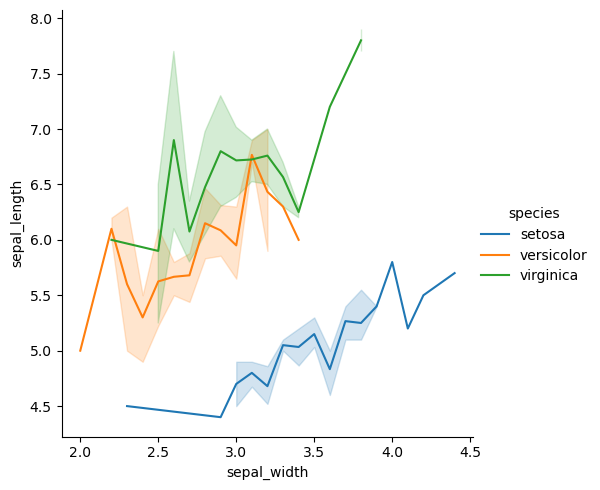

In [51]:
sns.relplot(data= iris_ds, x='sepal_width', y='sepal_length', hue ='species', kind='line')
plt.show()

#### #4. Which features would be best used to predict species?

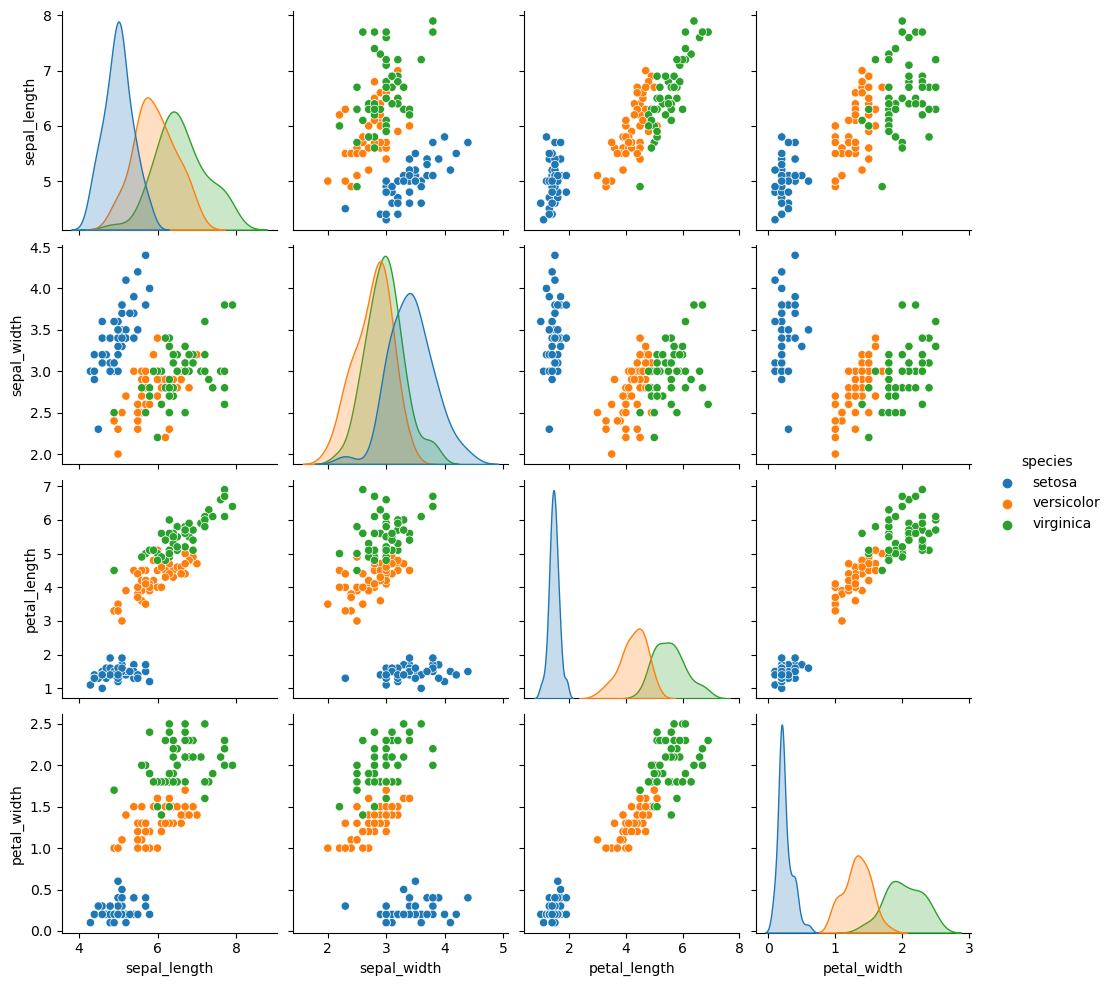

In [52]:
sns.pairplot(iris_ds, hue ='species')
plt.show()

In [13]:
#look at the average petal length by species
iris_ds.groupby('species').petal_length.agg('mean')

species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

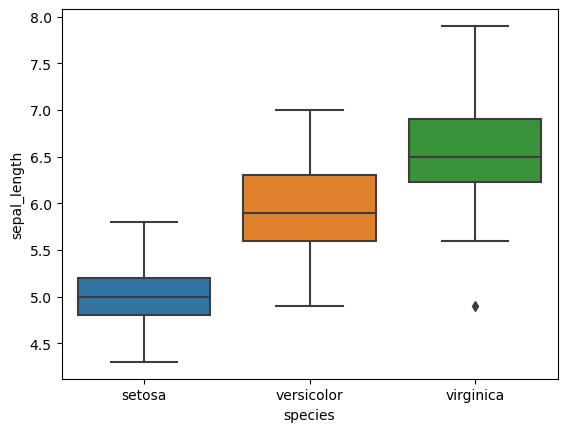

In [53]:
sns.boxplot(y = 'sepal_length', x = 'species', data = iris_ds)
plt.show()

<hr style="border:2px solid gray">

### Part II:

#### #1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?
Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [15]:
#bring in the anscombe dataset from seaborn
anscombe_ds= sns.load_dataset('anscombe')

In [16]:
#let's see what the data looks like
anscombe_ds.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [17]:
#what kind of data do we have?
anscombe_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [18]:
#get the descriptive stats from these columns
anscombe_ds.describe()

,x,y
count,44.000000,44.000000
mean,9.000000,7.500682
std,3.198837,1.958925
min,4.000000,3.100000
25%,7.000000,6.117500
50%,8.000000,7.520000
75%,11.000000,8.747500
max,19.000000,12.740000


In [19]:
#group by the dataset so we can see those stats more clearly
anscombe_ds.groupby('dataset').describe()

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

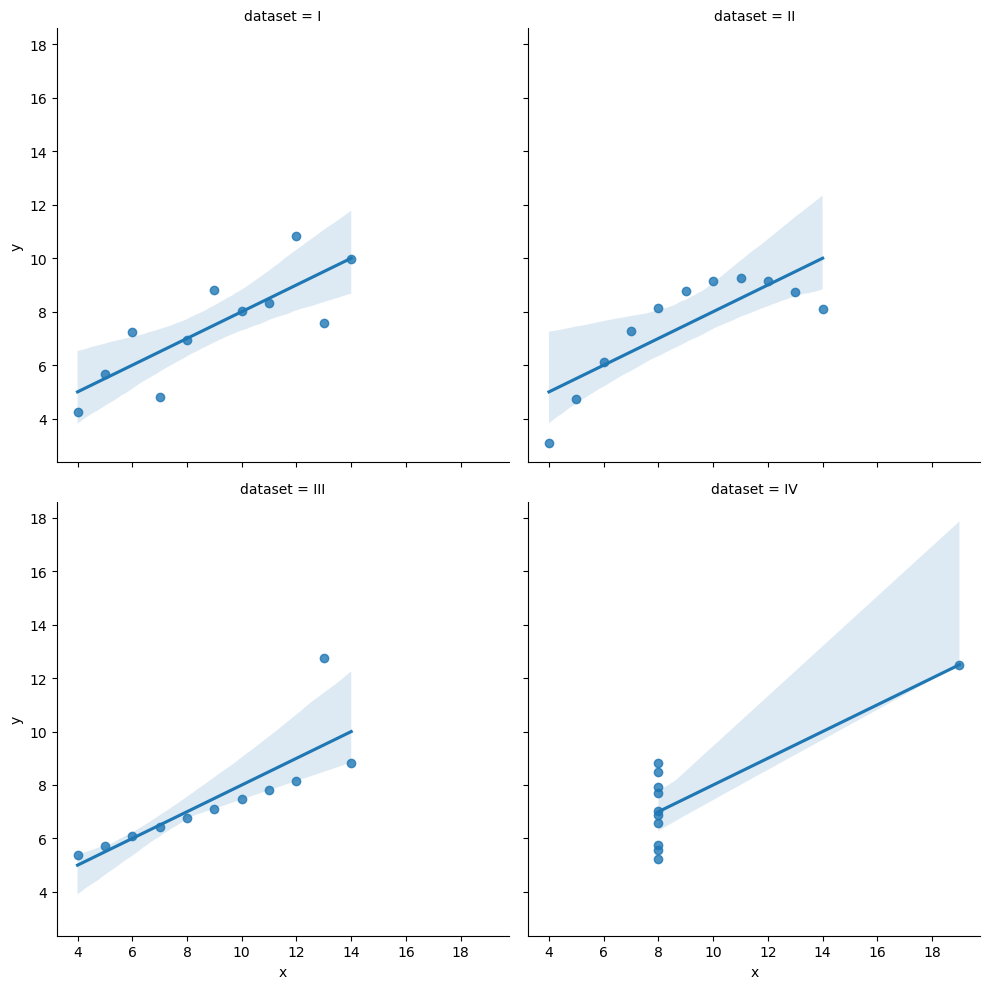

In [54]:
sns.lmplot(data = anscombe_ds, x='x', y= 'y', col = 'dataset', col_wrap= 2)
plt.show()

<hr style="border:0.5px solid gray">

#### #2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [21]:
#bring in insect spray dataset from seaborn
insect_spray_ds =data('InsectSprays')

In [22]:
#take a look
insect_spray_ds.head()

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A


In [23]:
insect_spray_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 1 to 72
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   count   72 non-null     int64 
 1   spray   72 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.7+ KB


In [24]:
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

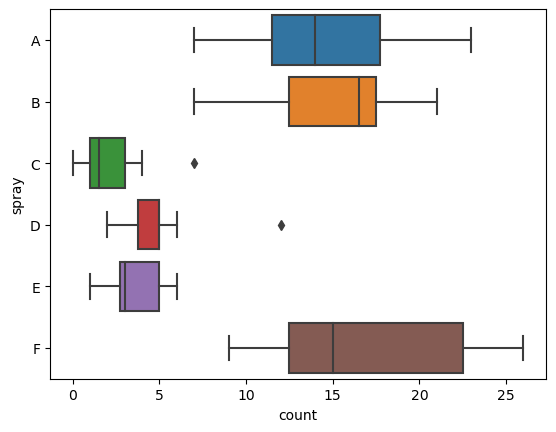

In [55]:
sns.boxplot(data=insect_spray_ds, x= 'count', y='spray')
plt.show()

<hr style="border:0.5px solid gray">

#### #3. Load the swiss dataset and read it's documentation. The swiss dataset is available from pydatset rather than seaborn. Create visualizations to answer the following questions:

In [26]:
#load swiss dataset from seaborn
swiss_ds = data('swiss')

In [27]:
#take a look
swiss_ds.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6


In [28]:
swiss_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 47 entries, Courtelary to Rive Gauche
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Fertility         47 non-null     float64
 1   Agriculture       47 non-null     float64
 2   Examination       47 non-null     int64  
 3   Education         47 non-null     int64  
 4   Catholic          47 non-null     float64
 5   Infant.Mortality  47 non-null     float64
dtypes: float64(4), int64(2)
memory usage: 2.6+ KB


##### #a. Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)


In [29]:
#creating a new column where 'catholic' is greater than 50%
#this cutoff can be whatever you desire
#in this instance, I picked 50% because that means more than half of the population
swiss_ds['is_catholic'] = swiss_ds['Catholic'] >50

In [30]:
#look at the new ds with the column we created
swiss_ds.head()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False


##### #b. Does whether or not a province is Catholic influence fertility?


In [31]:
#create a variable that groups 'is catholic' column by its average (mean)
fertility_catholic = swiss_ds.groupby('is_catholic').agg('mean')

In [32]:
#look at the data
#here we can see that majority Catholic (above 50%) provinces have 76.6% fertility vs 66% in non-majority Catholic
fertility_catholic

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
is_catholic,,,,,,
False,66.220690,43.393103,20.206897,12.137931,9.882759,19.565517
True,76.461111,62.366667,10.500000,9.111111,91.508889,20.550000


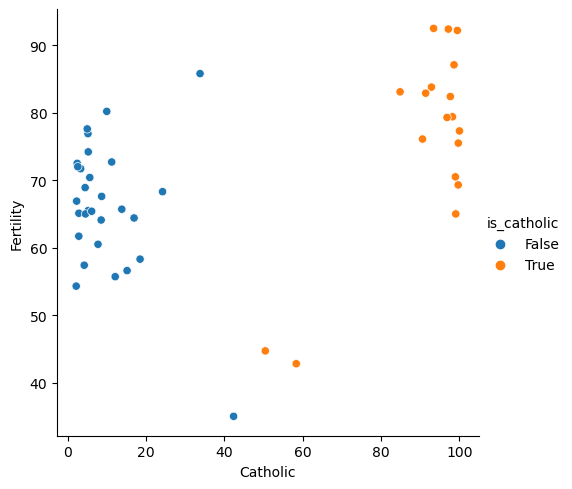

In [56]:
#visualize this is in a scatterplot
sns.relplot(data=swiss_ds, x='Catholic', y='Fertility', hue= 'is_catholic')
plt.show()

##### #c. What measure correlates most strongly with fertility?
**Answer**: education (negative correlation)

In [34]:
#this will show us the correlation between columns
#1 being completely correlated
swiss_ds.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556,0.402813
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859,0.410503
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022,-0.597861
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322,-0.154677
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496,0.961723
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000,0.166081
is_catholic,0.402813,0.410503,-0.597861,-0.154677,0.961723,0.166081,1.000000


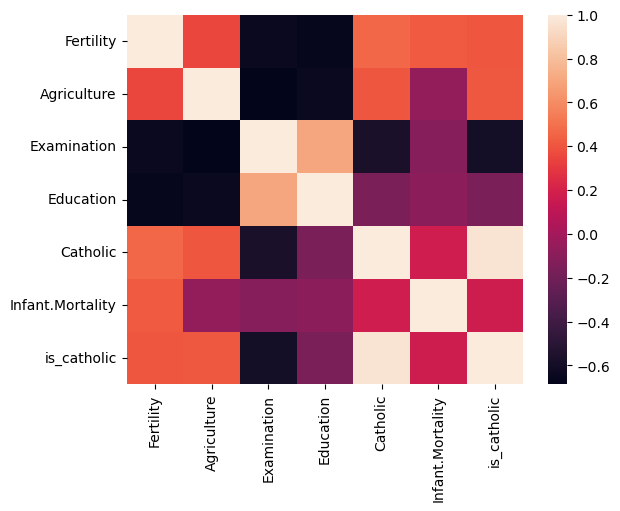

In [61]:
#visual representation of above info
sns.heatmap(swiss_ds.corr())

plt.show()

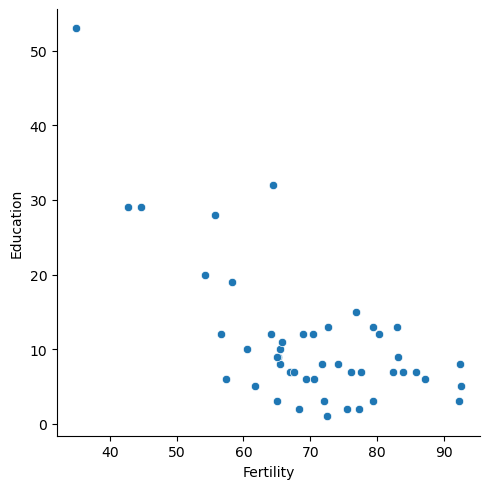

In [62]:
#this visual shows the correlation between fertility and education
#it appears that the more educated someone is, the less fertility they have (and vice versa)
sns.relplot(data= swiss_ds, x='Fertility', y='Education')
plt.show()

<hr style="border:0.5px solid gray">

#### #4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [37]:
#create a function that takes in your specific credentials for sql 
def get_db_url(database, host=host, user=username, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{database}'
    
#we are trying to pull in the chipotle dataframe
url = get_db_url("chipotle")

#our sql query
sql = "SELECT * FROM orders"

In [38]:
#set df to our sql import of chipotle
chipotle_df = pd.read_sql(sql, url, index_col="id")

In [39]:
#take a look at the data
chipotle_df.head()

,order_id,quantity,item_name,choice_description,item_price
id,,,,,
1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
2,1,1,Izze,[Clementine],$3.39
3,1,1,Nantucket Nectar,[Apple],$3.39
4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [40]:
#another way to read in the dataframe from sql
chipotle_df2 = pd.read_sql('SELECT * FROM orders', url)

#see that you get the same data with different ways of importing
chipotle_df2.head()

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98


In [41]:
#what kind of data does this df hold
chipotle_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4622 entries, 1 to 4622
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  4622 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 216.7+ KB


In [42]:
#item price is currently an object because it has dollar signs- let's fix that
chipotle_df['item_price'] = chipotle_df.item_price.str.replace('$', '').astype('float')

/var/folders/tq/b0dt2mpn2d1d4_1c638syx_h0000gp/T/ipykernel_30838/424420230.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  chipotle_df['item_price'] = chipotle_df.item_price.str.replace('$', '').astype('float')


In [43]:
#finding top four items by quantity sold
top_four_sellers= chipotle_df.groupby('item_name').quantity.agg(['sum']).sort_values(by='sum', ascending = False).head(4)

#call our new variable to see top 4 sellers
#BUT this does not give us top four by revenue as the question calls for
top_four_sellers

,sum
item_name,
Chicken Bowl,761
Chicken Burrito,591
Chips and Guacamole,506
Steak Burrito,386


In [44]:
#finding top four items by revenue
top_four_revenue = chipotle_df.groupby('item_name').item_price.sum().nlargest(4)

#see who has the highest revenue
top_four_revenue

item_name
Chicken Bowl       7342.73
Chicken Burrito    5575.82
Steak Burrito      3851.43
Steak Bowl         2260.19
Name: item_price, dtype: float64

In [45]:
#lets put top 4 sellers and top 4 revenues together
top_four_sellers.reset_index().merge(chipotle_df.groupby('item_name').item_price.sum().reset_index(), on='item_name')

,item_name,sum,item_price
0,Chicken Bowl,761,7342.73
1,Chicken Burrito,591,5575.82
2,Chips and Guacamole,506,2201.04
3,Steak Burrito,386,3851.43


In [46]:
plt.figure(figsize = (8, 5))
sns.barplot(y = 'item_name', x = 'item_price', data = top_four_revenue)
plt.title('Most popular items and revenue')

plt.ylabel("") # to get remove the column_name
plt.xlabel("Gross Revenue")
plt.suptitle("Revenue from Top 4 selling Items")

ValueError: Could not interpret input 'item_price'

<hr style="border:0.5px solid gray">

#### #5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [63]:
sleepstudy_ds = data('sleepstudy')

In [64]:
sleepstudy_ds.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [65]:
sleepstudy_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


In [66]:
data('sleepstudy', show_doc= True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

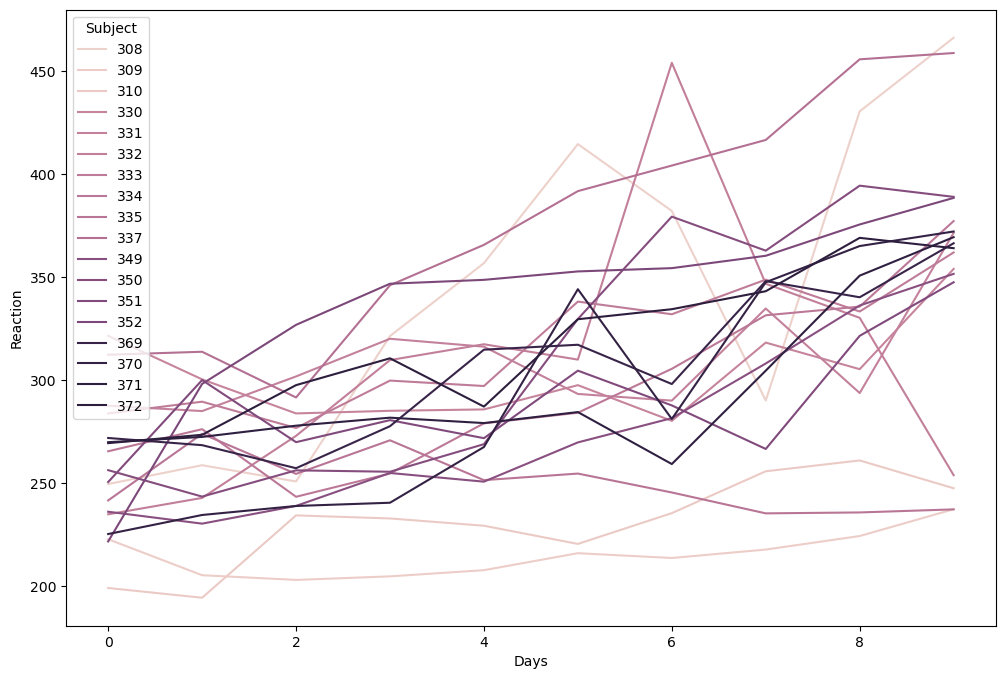

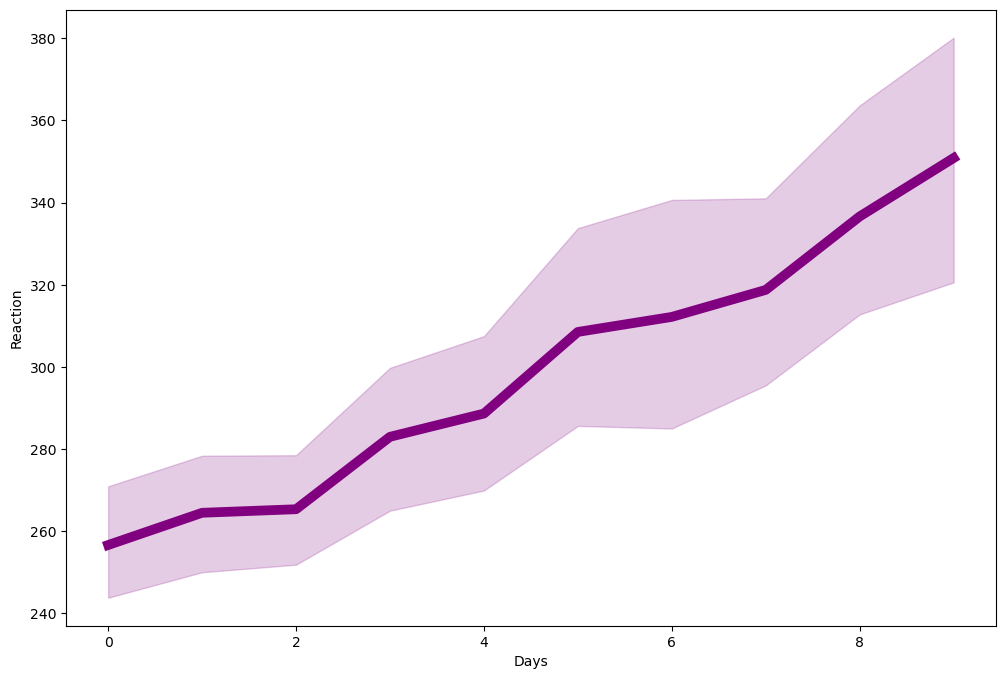

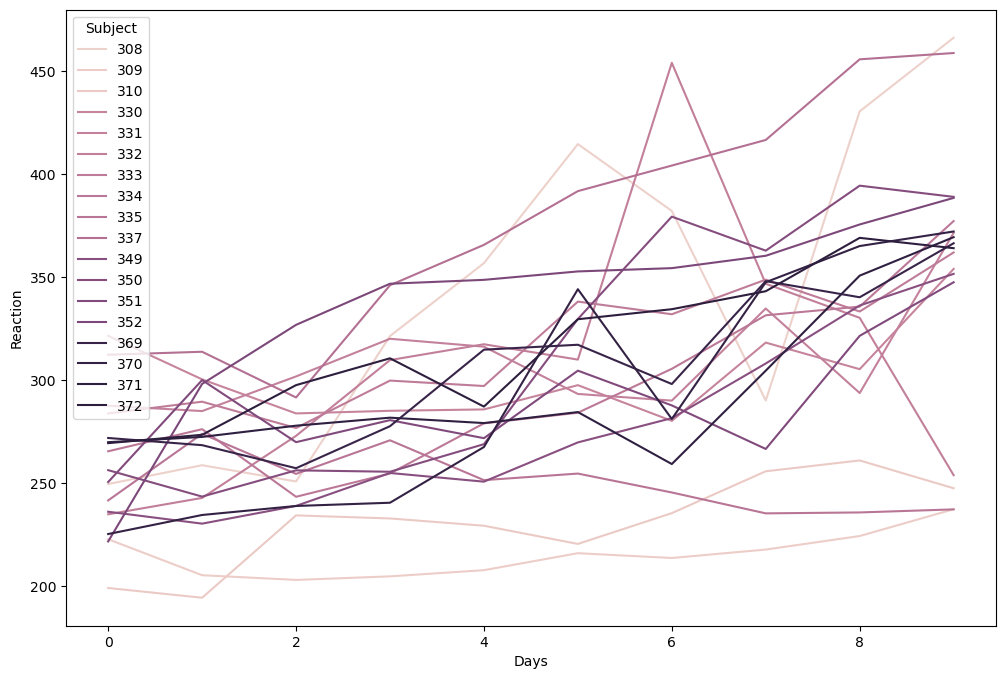

In [69]:
#call the figure size
plt.figure(figsize=(12,8))

#looking for reaction over a number of days with hue as the subject (include a legend)
sns.lineplot(data= sleepstudy_ds, x= 'Days', y= 'Reaction', hue= 'Subject', legend =all)
plt.show()

In [68]:
#call the figure size
plt.figure(figsize=(12,8))

#we also wanted an average line
sns.lineplot(data = sleepstudy_ds, x = 'Days', y = 'Reaction', color = 'purple', linewidth = 7, estimator = 'mean')
plt.show()

<AxesSubplot:xlabel='Days', ylabel='Reaction'>

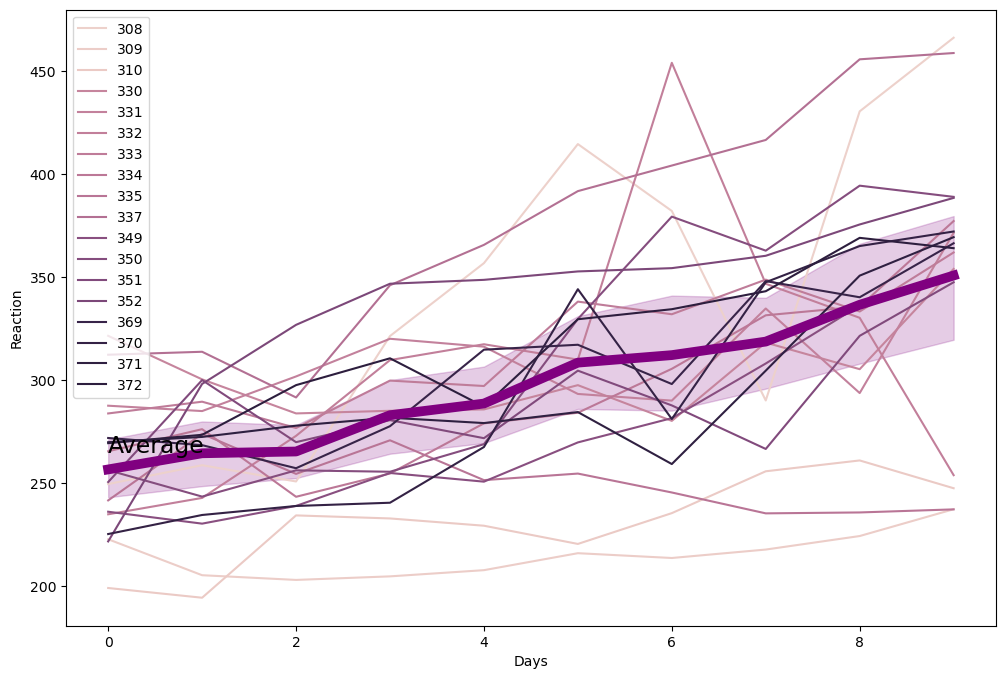

In [70]:
#put that together
plt.figure(figsize=(12,8))
sns.lineplot(data= sleepstudy_ds, x= 'Days', y= 'Reaction', hue= 'Subject', legend =all)
sns.lineplot(data = sleepstudy_ds, x = 'Days', y = 'Reaction', color = 'purple', linewidth = 7, estimator = 'mean')
plt.annotate('Average',(0,265),fontsize=17)

plt.show()